In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [117]:
df = pd.read_csv("dataset.csv")

In [118]:
df.head()

,lokasi,latitude,longitude,dikonfirmasi,sembuh,meninggal
0,Aceh,4.695135,96.749397,7,4,1
1,Jakarta,-6.200000,106.816666,3260,286,298
2,West Java,-6.914864,107.608238,756,75,68
3,East Java,-7.250445,112.768845,603,101,58
4,Central Java,-6.966667,110.416664,449,51,44


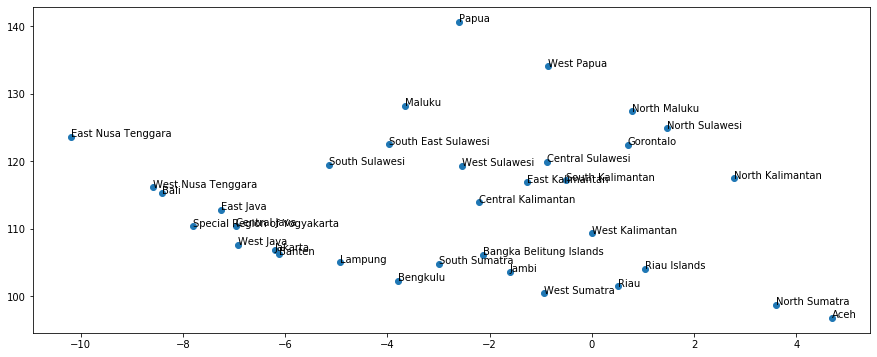

In [119]:
x = df["latitude"]
y = df["longitude"]
n = df["lokasi"]
# plt.plot(x,y,"ko")
# plt.show()

fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [120]:
fitur = df.drop(['lokasi', 'latitude', 'longitude'], axis=1)

In [121]:
fitur.head()

,dikonfirmasi,sembuh,meninggal
0,7,4,1
1,3260,286,298
2,756,75,68
3,603,101,58
4,449,51,44


In [122]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [123]:
x_array = np.array(fitur)

In [124]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
# x_scaled

In [125]:
x_array = np.array(fitur)
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit(x_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [126]:
lengkap = df.copy()
lengkap['kluster'] = kmeans.labels_

In [127]:
lengkap = df.copy()
lengkap['kluster'] = kmeans.labels_
lengkap.head()

,lokasi,latitude,longitude,dikonfirmasi,sembuh,meninggal,kluster
0,Aceh,4.695135,96.749397,7,4,1,2
1,Jakarta,-6.200000,106.816666,3260,286,298,1
2,West Java,-6.914864,107.608238,756,75,68,0
3,East Java,-7.250445,112.768845,603,101,58,0
4,Central Java,-6.966667,110.416664,449,51,44,0


In [130]:
lengkap.loc[lengkap['kluster'] == 0, 'kluster'] = 'berbahaya'
lengkap.loc[lengkap['kluster'] == 1, 'kluster'] = 'sangat berbahaya'
lengkap.loc[lengkap['kluster'] == 2, 'kluster'] = 'aman'
lengkap

,lokasi,latitude,longitude,dikonfirmasi,sembuh,meninggal,kluster
0,Aceh,4.695135,96.749397,7,4,1,aman
1,Jakarta,-6.200000,106.816666,3260,286,298,sangat berbahaya
2,West Java,-6.914864,107.608238,756,75,68,berbahaya
3,East Java,-7.250445,112.768845,603,101,58,berbahaya
4,Central Java,-6.966667,110.416664,449,51,44,berbahaya
5,South Sulawesi,-5.135399,119.423790,374,73,30,berbahaya
6,Banten,-6.120000,106.150276,341,17,35,berbahaya
7,Bali,-8.409518,115.188919,150,42,3,aman
8,Papua,-2.598744,140.673179,118,28,6,aman
9,South Kalimantan,-0.502106,117.153709,98,9,6,aman


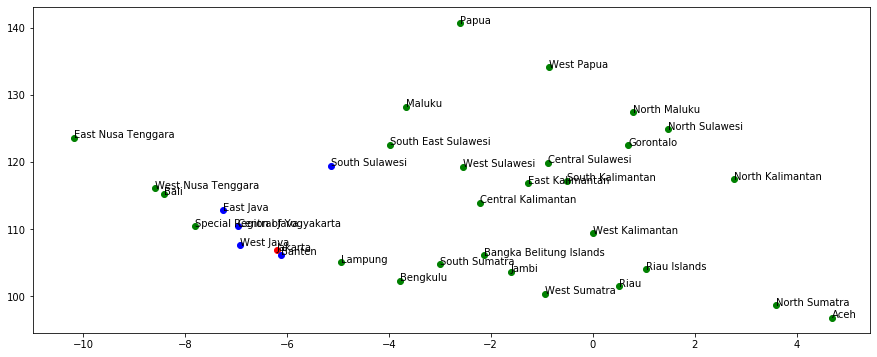

In [129]:
x = lengkap["latitude"]
y = lengkap["longitude"]
n = lengkap["lokasi"]
fig, ax = plt.subplots(figsize=(15,6))
for i in range(len(lengkap['lokasi'])) :
    if (lengkap['kluster'][i] == 'berbahaya') :
        ax.scatter(x[i], y[i], color='blue')
    elif (lengkap['kluster'][i] == 'sangat berbahaya') :
        ax.scatter(x[i], y[i], color='red')
    elif (lengkap['kluster'][i] == 'aman') : 
        ax.scatter(x[i], y[i], color='green')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))